In [117]:
import numpy as np
from sklearn.model_selection import train_test_split
#import tensorflow as tf
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.nn import CrossEntropyLoss
from torch.optim import SGD
import seaborn as sns
import matplotlib.pyplot as plt
import torch
import pandas as pd

In [118]:
#
# This is a sample Notebook to demonstrate how to read "MNIST Dataset"
#
import numpy as np # linear algebra
import struct
from array import array
from os.path  import join

#
# MNIST Data Loader Class
#
class MnistDataloader(object):
    def __init__(self, training_images_filepath,training_labels_filepath,
                 test_images_filepath, test_labels_filepath):
        self.training_images_filepath = training_images_filepath
        self.training_labels_filepath = training_labels_filepath
        self.test_images_filepath = test_images_filepath
        self.test_labels_filepath = test_labels_filepath
    
    def read_images_labels(self, images_filepath, labels_filepath):        
        labels = []
        with open(labels_filepath, 'rb') as file:
            magic, size = struct.unpack(">II", file.read(8))
            if magic != 2049:
                raise ValueError('Magic number mismatch, expected 2049, got {}'.format(magic))
            labels = array("B", file.read())        
        
        with open(images_filepath, 'rb') as file:
            magic, size, rows, cols = struct.unpack(">IIII", file.read(16))
            if magic != 2051:
                raise ValueError('Magic number mismatch, expected 2051, got {}'.format(magic))
            image_data = array("B", file.read())        
        images = []
        for i in range(size):
            images.append([0] * rows * cols)
        for i in range(size):
            img = np.array(image_data[i * rows * cols:(i + 1) * rows * cols])
            img = img.reshape(28, 28)
            images[i][:] = img            
        
        return images, labels
            
    def load_data(self):
        x_train, y_train = self.read_images_labels(self.training_images_filepath, self.training_labels_filepath)
        x_test, y_test = self.read_images_labels(self.test_images_filepath, self.test_labels_filepath)
        return (x_train, y_train),(x_test, y_test)        


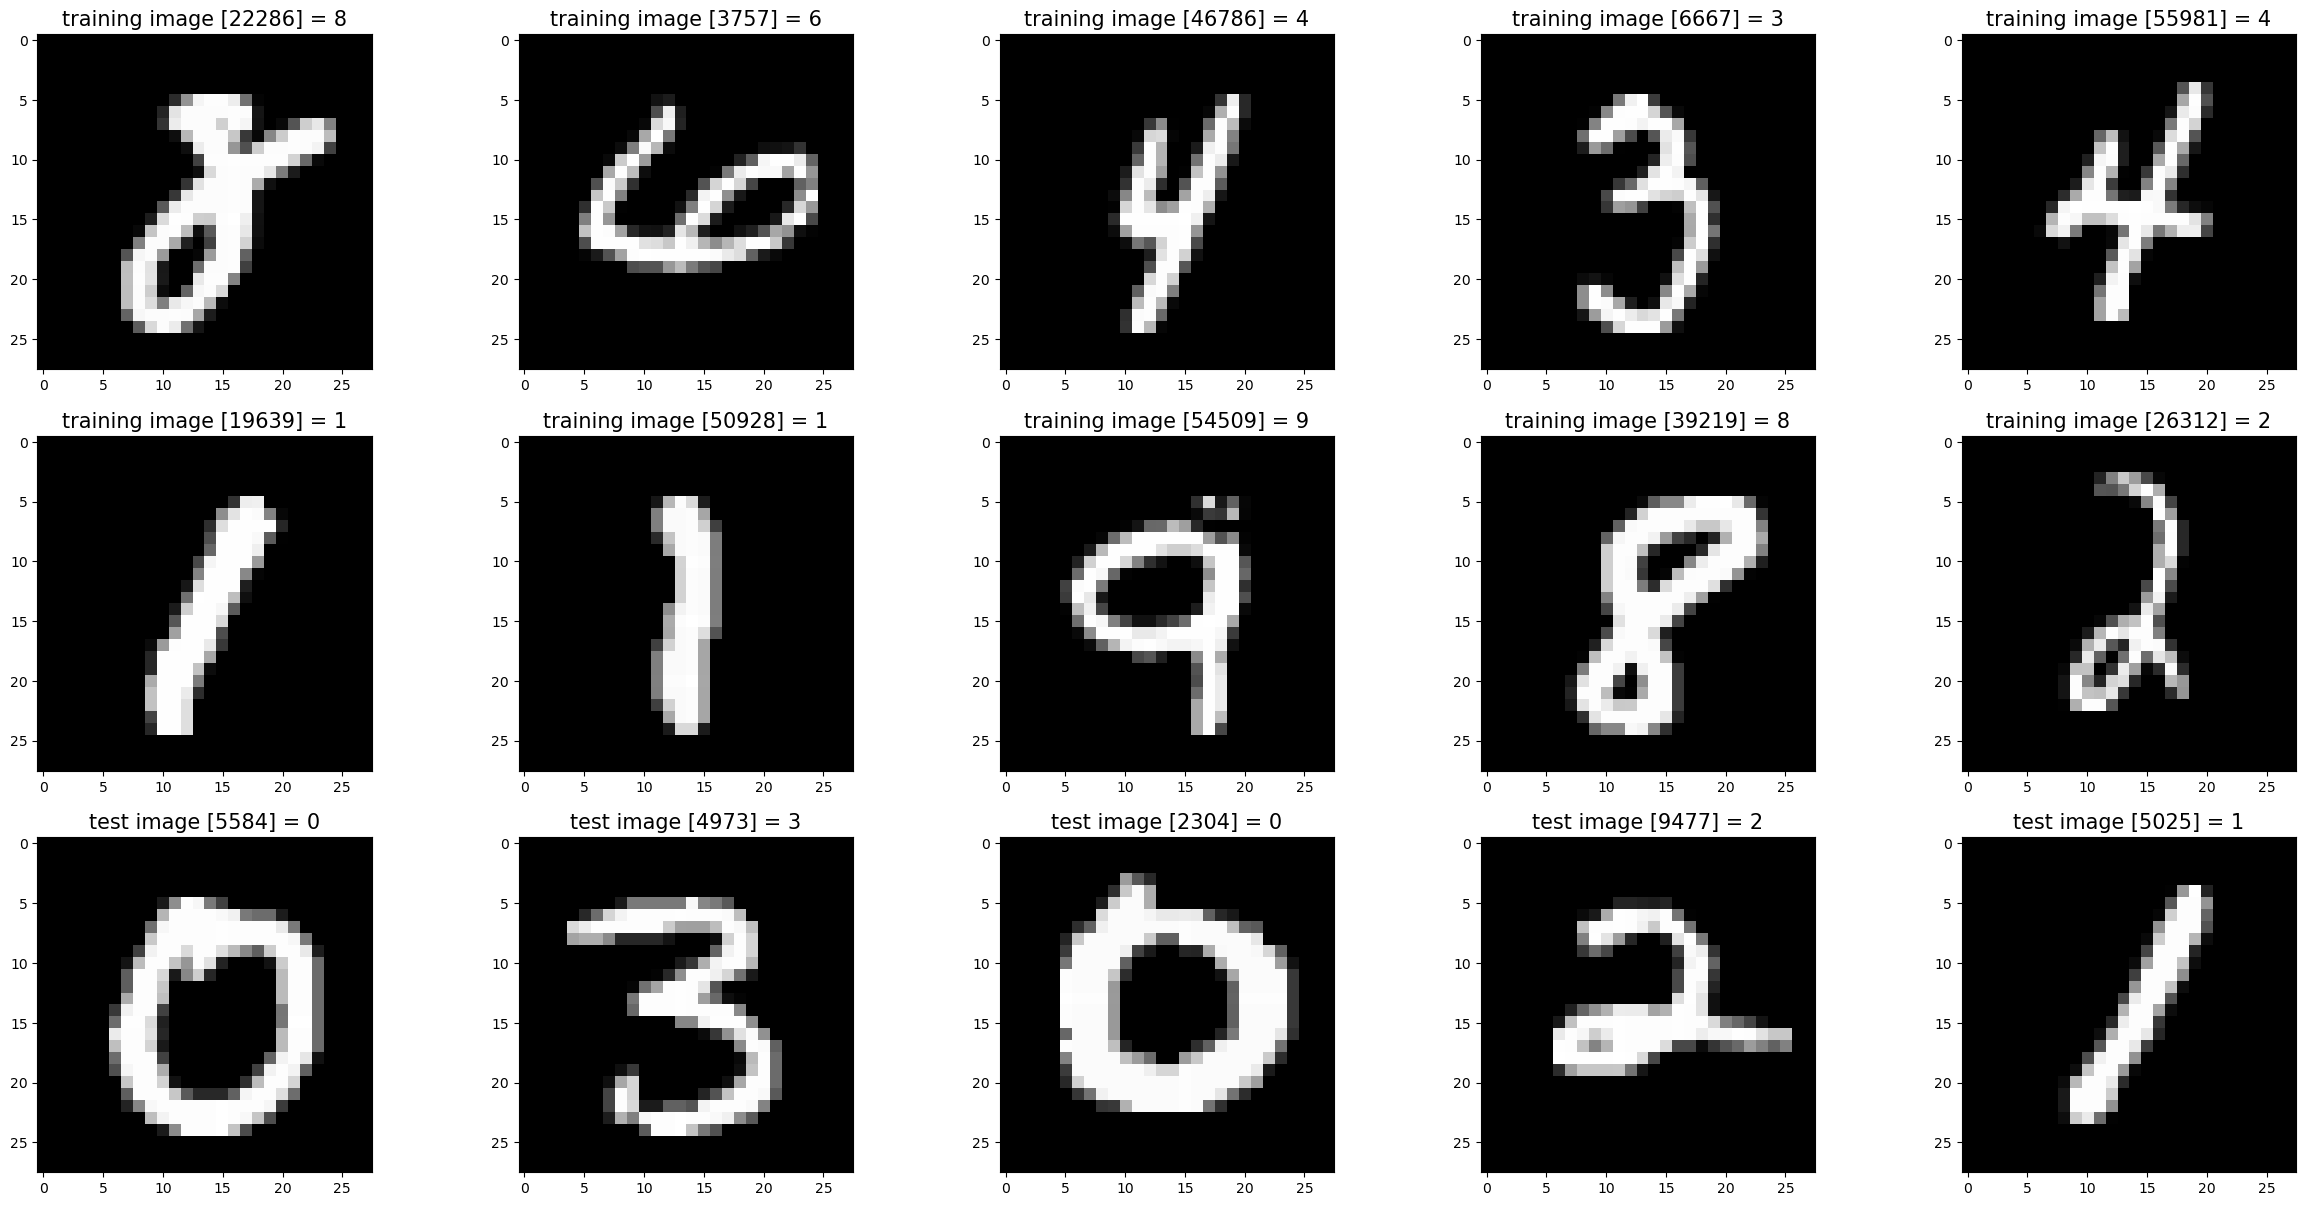

In [119]:
#
# Verify Reading Dataset via MnistDataloader class
#
%matplotlib inline
import random
import matplotlib.pyplot as plt

#
# Set file paths based on added MNIST Datasets
#
input_path = 'C:\\Users\\mmema\\Downloads\\archive'
training_images_filepath = join(input_path, 'train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, 'train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, 't10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, 't10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Helper function to show a list of images with their relating titles
#
def show_images(images, title_texts):
    cols = 5
    rows = int(len(images)/cols) + 1
    plt.figure(figsize=(30,20))
    index = 1    
    for x in zip(images, title_texts):        
        image = x[0]        
        title_text = x[1]
        plt.subplot(rows, cols, index)        
        plt.imshow(image, cmap=plt.cm.gray)
        if (title_text != ''):
            plt.title(title_text, fontsize = 15);        
        index += 1

#
# Load MINST dataset
#
mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

#
# Show some random training and test images 
#
images_2_show = []
titles_2_show = []
for i in range(0, 10):
    r = random.randint(1, 60000)
    images_2_show.append(x_train[r])
    titles_2_show.append('training image [' + str(r) + '] = ' + str(y_train[r]))    

for i in range(0, 5):
    r = random.randint(1, 10000)
    images_2_show.append(x_test[r])        
    titles_2_show.append('test image [' + str(r) + '] = ' + str(y_test[r]))    

show_images(images_2_show, titles_2_show)


In [120]:

x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2,stratify= y_train, random_state=42)
x_train = np.array(x_train)
x_validate = np.array(x_validate)
y_train = np.array(y_train)
y_validate = np.array(y_validate)
print(type(x_train))
print("len training:", len(x_train), len(y_train))
print("len validation:", len(x_validate), len(y_validate))


x_train = torch.tensor(x_train)
x_validate = torch.tensor(x_validate)
y_train = torch.tensor(y_train)

y_validate = torch.tensor(y_validate)

print(x_train)
for i in range(len(x_train)):
    
    x_train[i].view(-1)
    y_train[i].view(-1)
    
for j in range(len(y_validate)):
    y_train[i].view(-1)
    y_train[i].view(-1)


#print(x_train)
print('*'*50)
#print(y_train)
print('*'*50)
#print(x_validate)
print('*'*50)
#print(y_validate)
print('*'*50)

<class 'numpy.ndarray'>
len training: 48000 48000
len validation: 12000 12000
tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

    

In [121]:
batch=16
loader = DataLoader(list(zip(x_train,y_train)), shuffle=True, batch_size=batch)
validation_loader=DataLoader(list(zip(x_validate,y_validate)), shuffle=False, batch_size=batch)

In [122]:
class myNetwork(nn.Module):
    def __init__(self ):
        super(myNetwork,self).__init__()
        self.layer1 = nn.Linear(784, 128)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x=x.float()
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

In [123]:
model=myNetwork()
num_epochs=10
learning_rate=0.0001

optim=SGD(model.parameters(),lr=learning_rate)
lossFunc=CrossEntropyLoss()

In [124]:
loses=[]
validation_loss=[]
for i in range(num_epochs):
    total_loss=0
    model.train()
    for X,Y in loader:
        outputs = model(X)
        Y = Y.long()
        loss = lossFunc(outputs, Y)
        loss.backward()
        total_loss+=float(loss)
        optim.step()
        optim.zero_grad()
    loses.append(total_loss)
    
    with torch.no_grad():
        model.eval()
        total_val_loss = 0.0
        for val_data, val_labels in validation_loader:
            val_labels = val_labels.long()
            val_outputs = model(val_data)
            val_loss = lossFunc(val_outputs, val_labels)
            
            total_val_loss+=float(val_loss)
        validation_loss.append(total_val_loss)
        print(f'loss = {loses}')
        print('%'*50)
        print(f'validation = {validation_loss}')

loss = [3080.6511495877494]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
validation = [365.1572858610889]
loss = [3080.6511495877494, 1007.6059374513279]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
validation = [365.1572858610889, 257.8400425700238]
loss = [3080.6511495877494, 1007.6059374513279, 698.2133251944324]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
validation = [365.1572858610889, 257.8400425700238, 220.7056531017879]
loss = [3080.6511495877494, 1007.6059374513279, 698.2133251944324, 555.2454034911352]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
validation = [365.1572858610889, 257.8400425700238, 220.7056531017879, 200.0918948855542]
loss = [3080.6511495877494, 1007.6059374513279, 698.2133251944324, 555.2454034911352, 461.23650879731576]
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
validation = [365.1572858610889, 257.8400425700238, 220.7056531017879, 200.0918948855542, 186.46670100284973]
loss = [3080.6511495877494, 1007.6059374513279, 698.21

In [ ]:
#print(type(x_train))
#y_train= numpy.array(y_train)
#x_train= numpy.array(x_train)
#y_train = y_train.to_numpy()
#x_train = x_train.to_numpy()

#y = torch.tensor(y_train)
#x = torch.tensor(x_train)

x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2,stratify= y, random_state=42)
print("len training:", len(x_train), len(y_train))
print("len validation:", len(x_validate), len(y_validate))
#print(training_data_x[0])